# **Import Libraries and modules**

In [46]:
# https://keras.io/
!pip install -q keras
import keras
from datetime import datetime
print(datetime.now())

2019-06-19 14:21:44.714960


In [47]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.now())

2019-06-19 14:21:44.725040


### Load pre-shuffled MNIST data into train and test sets

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.now())

2019-06-19 14:21:45.045394


(60000, 28, 28)
2019-06-19 14:21:45.076658


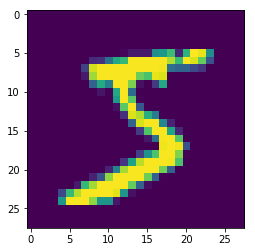

In [49]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.now())

In [50]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.now())

2019-06-19 14:21:45.232099


In [51]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.now())

2019-06-19 14:21:45.362662


In [52]:
y_train[:10]
print(datetime.now())

2019-06-19 14:21:45.372216


In [53]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.now())

2019-06-19 14:21:45.392563


In [54]:
Y_train[:10]
print(datetime.now())

2019-06-19 14:21:45.399760


In [84]:
## MAIN BLOCK

from keras.layers import Activation,Input,Conv2D,MaxPooling2D
from keras.layers.merge import concatenate
from keras.models import Model

x1 = Input(shape=(28,28,1))
x2 = Conv2D(10,3,activation='relu',name='layer1',padding='same')(x1)
c1 = concatenate([x2,x1])
x3 = Conv2D(16,3,activation='relu',name='layer2',padding='same')(c1)
c2 = concatenate([x2,x1,x3])
x4 = MaxPooling2D(pool_size=(2, 2))(c2)
x5 = Conv2D(10,3,activation='relu',name='layer3',padding='same')(x4)
c3 = concatenate([x4,x5])
x6 = Conv2D(16,3,activation='relu',name='layer4',padding='same')(c3)
c4 = concatenate([x4,x5,x6])
x7 = Conv2D(32,3,activation='relu',name='layer5',padding='same')(c4)
c5 = concatenate([x5,x6,x7])
x8 = MaxPooling2D(pool_size=(2, 2))(c5)
x9 = Conv2D(10,3,activation='relu',name='layer6',padding='same')(x8)
c6 = concatenate([x8,x9])
x10 = Conv2D(10,3,activation='relu',name='layer7',padding='same') (c6)
c7 = concatenate([x8,x9,x10])

x11 = Conv2D(10,3,activation='relu',name='layer8',padding='same') (c7)
x12 = Conv2D(10,7,activation='relu',name='layer9')(x11)
xf = Flatten()(x12)
x13 = Activation('softmax')(xf)
model = Model(x1,x13)

print(datetime.now())

2019-06-19 16:37:43.336556


In [85]:
model.summary()

print(datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
layer1 (Conv2D)                 (None, 28, 28, 10)   100         input_38[0][0]                   
__________________________________________________________________________________________________
concatenate_122 (Concatenate)   (None, 28, 28, 11)   0           layer1[0][0]                     
                                                                 input_38[0][0]                   
__________________________________________________________________________________________________
layer2 (Conv2D)                 (None, 28, 28, 16)   1600        concatenate_122[0][0]            
__________

In [86]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.now())

2019-06-19 16:37:58.097094


In [87]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0619 16:38:02.231864 140700198365056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0619 16:38:02.354671 140700198365056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.5471 - acc: 0.8531
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2563 - acc: 0.8979
Epoch 3/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2426 - acc: 0.9008
Epoch 4/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2355 - acc: 0.9025
Epoch 5/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2306 - acc: 0.9034
Epoch 6/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.2274 - acc: 0.9045
Epoch 7/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.2244 - acc: 0.9051
Epoch 8/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.2225 - acc: 0.9058
Epoch 9/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.2204 - acc: 0.9065
Epoch 10/10
60000/60000 [==============================] - 14s 229us/step - loss: 

In [89]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.now())

2019-06-19 16:40:47.803372


In [91]:
print(score)
print(datetime.now())

[0.23266740307159775, 0.905]
2019-06-19 16:41:00.708406
